In [1]:
%pylab inline
import uncertainties
from uncertainties import unumpy as unp
from numpy import array as array

# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path+".TKA", 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset

Populating the interactive namespace from numpy and matplotlib


In [46]:
def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, val(x), val(y),sigma=err(x), p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)

def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x

def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

def gaus(x, mu, sigma, A, B):
    import numpy as np
    return B + A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2))

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, A, B: B + A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)), p0=p0)

In [3]:
data = read("TSp")
time = 55370
data[1] = unp.uarray(data[1], [sqrt(item) for item in data[1]])
data[1] = data[1]/time
%store -r untergrund
data[1] -= untergrund[1]

In [43]:
energy_params

array([1.0+/-inf, 1.0+/-inf], dtype=object)

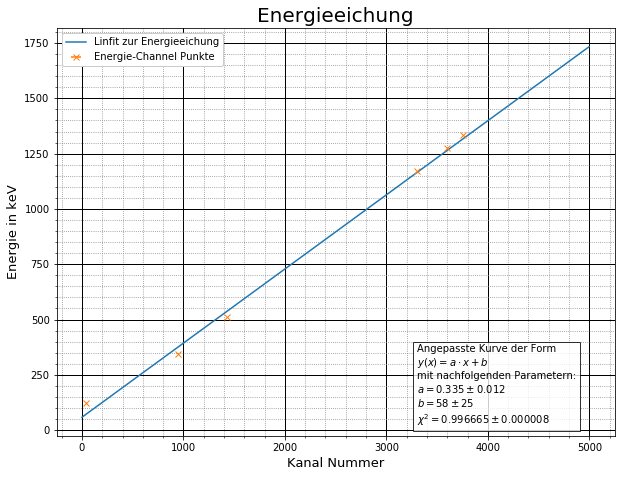

In [58]:
%store -r cobalt_left
%store -r cobalt_right
%store -r europium_left
%store -r europium_right
%store -r europium_right2
%store -r natrium_left
%store -r natrium_right
calibr = [
    
    array([cobalt_left[0],cobalt_right[0],europium_left[0],europium_right2[0],natrium_left[0],natrium_right[0]]),
    array([1173,1333, 122,344,511, 1275])
]
energy_params, energy_errs = linfit_pm(*calibr,p0=(0.5,10))
x = np.arange(0,5000)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(x, val(energy_params[0]*x+energy_params[1]),label="Linfit zur Energieeichung")
plt.errorbar(val(calibr[0]), val(calibr[1]),xerr = err(calibr[0]),fmt="x", label="Energie-Channel Punkte")
plt.text(3300,30,"Angepasste Kurve der Form\n"+
        r"$y(x)=a\cdot x + b$" +"\n"+
        "mit nachfolgenden Parametern:\n"+
        r"$a = {:L}$".format(energy_params[0])+"\n"+
        r"$b = {:L}$".format(energy_params[1])+"\n"+
        r"$\chi^2 = {:L}$".format(energy_errs),
        bbox={'facecolor':'white', 'alpha':0.8}, fontsize=10)


###   Label / Title

plt.ylabel(r'Energie in keV', fontsize=13)
plt.xlabel(r'Kanal Nummer', fontsize=13)
plt.title('Energieeichung', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,1024])
#axes.set_ylim([0,220000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(framealpha=1)
#plt.savefig('Energieeichung.png')
plt.show()

In [59]:
data[0] = data[0]*energy_params[0]+energy_params[1]

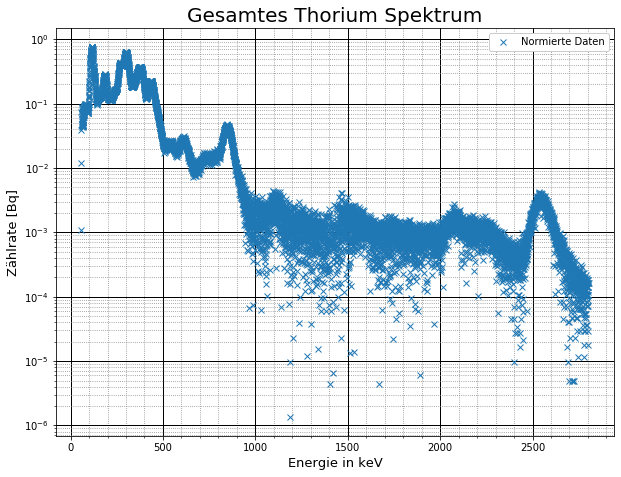

In [77]:



fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(val(data[0]), val(data[1]),"x", label="Normierte Daten")
plt.semilogy()



###   Label / Title

plt.ylabel(r'Zählrate [Bq]', fontsize=13)
plt.xlabel(r'Energie in keV', fontsize=13)
plt.title('Gesamtes Thorium Spektrum', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,1024])
#axes.set_ylim([0,220000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(framealpha=1)
#plt.savefig('Th_ganz.png')
plt.show()

In [72]:
def indexfinder(x):
    itera = 0
    for item in data[0]:
        if abs(item-x)<1:
            print(item, itera)
        itera +=1

In [73]:
indexfinder(500)

499+/-29 1316
500+/-29 1317
500+/-29 1318
500+/-29 1319
501+/-29 1320
501+/-29 1321


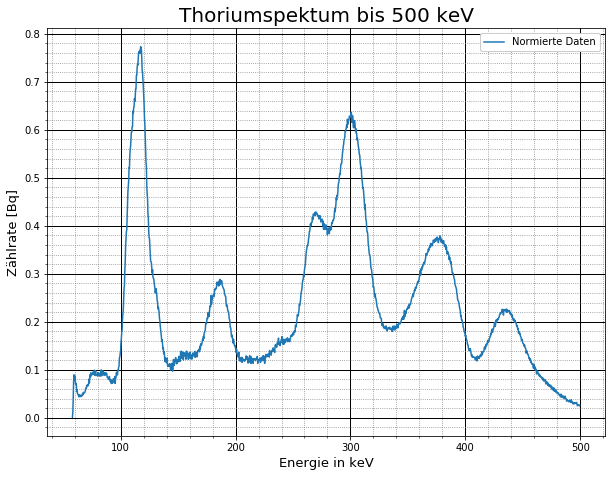

In [78]:
start1, stop1 = 0,1318


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(val(data[0][start1:stop1]), val(data[1][start1:stop1]), label="Normierte Daten")
#plt.semilogy()



###   Label / Title

plt.ylabel(r'Zählrate [Bq]', fontsize=13)
plt.xlabel(r'Energie in keV', fontsize=13)
plt.title('Thoriumspektum bis 500 keV', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,1024])
#axes.set_ylim([0,220000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(framealpha=1)
#plt.savefig('Th_ganz.png')
plt.show()